<a href="https://colab.research.google.com/github/Dogiparthy-Harsha/timegpt_rdl/blob/main/Fine_tune.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nixtla

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 2.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from nixtla import NixtlaClient
from utilsforecast.losses import mae, mse
from utilsforecast.evaluation import evaluate

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
nixtla_client = NixtlaClient(
    # defaults to os.environ.get("NIXTLA_API_KEY")
    api_key = 'nixak-s45CgSeSZ7ylHasOPRVWnvGrrdbfCA2iU1ghHR1GeYOCnDvUcsF51IJa6JfPI2V5zyZ4vPVGb3gXlPR9'
)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Nixtla/transfer-learning-time-series/main/datasets/electricity.csv')
df.head()

,unique_id,ds,y
0,BE,2011-01-09 00:00:00,32.54
1,BE,2011-01-09 01:00:00,21.55
2,BE,2011-01-09 02:00:00,15.71
3,BE,2011-01-09 03:00:00,10.58
4,BE,2011-01-09 04:00:00,10.32


In [ ]:
timegpt_fcst_finetune_df = nixtla_client.forecast(
    df=df, h=12, finetune_steps=10,
    time_col='ds', target_col='y',
)

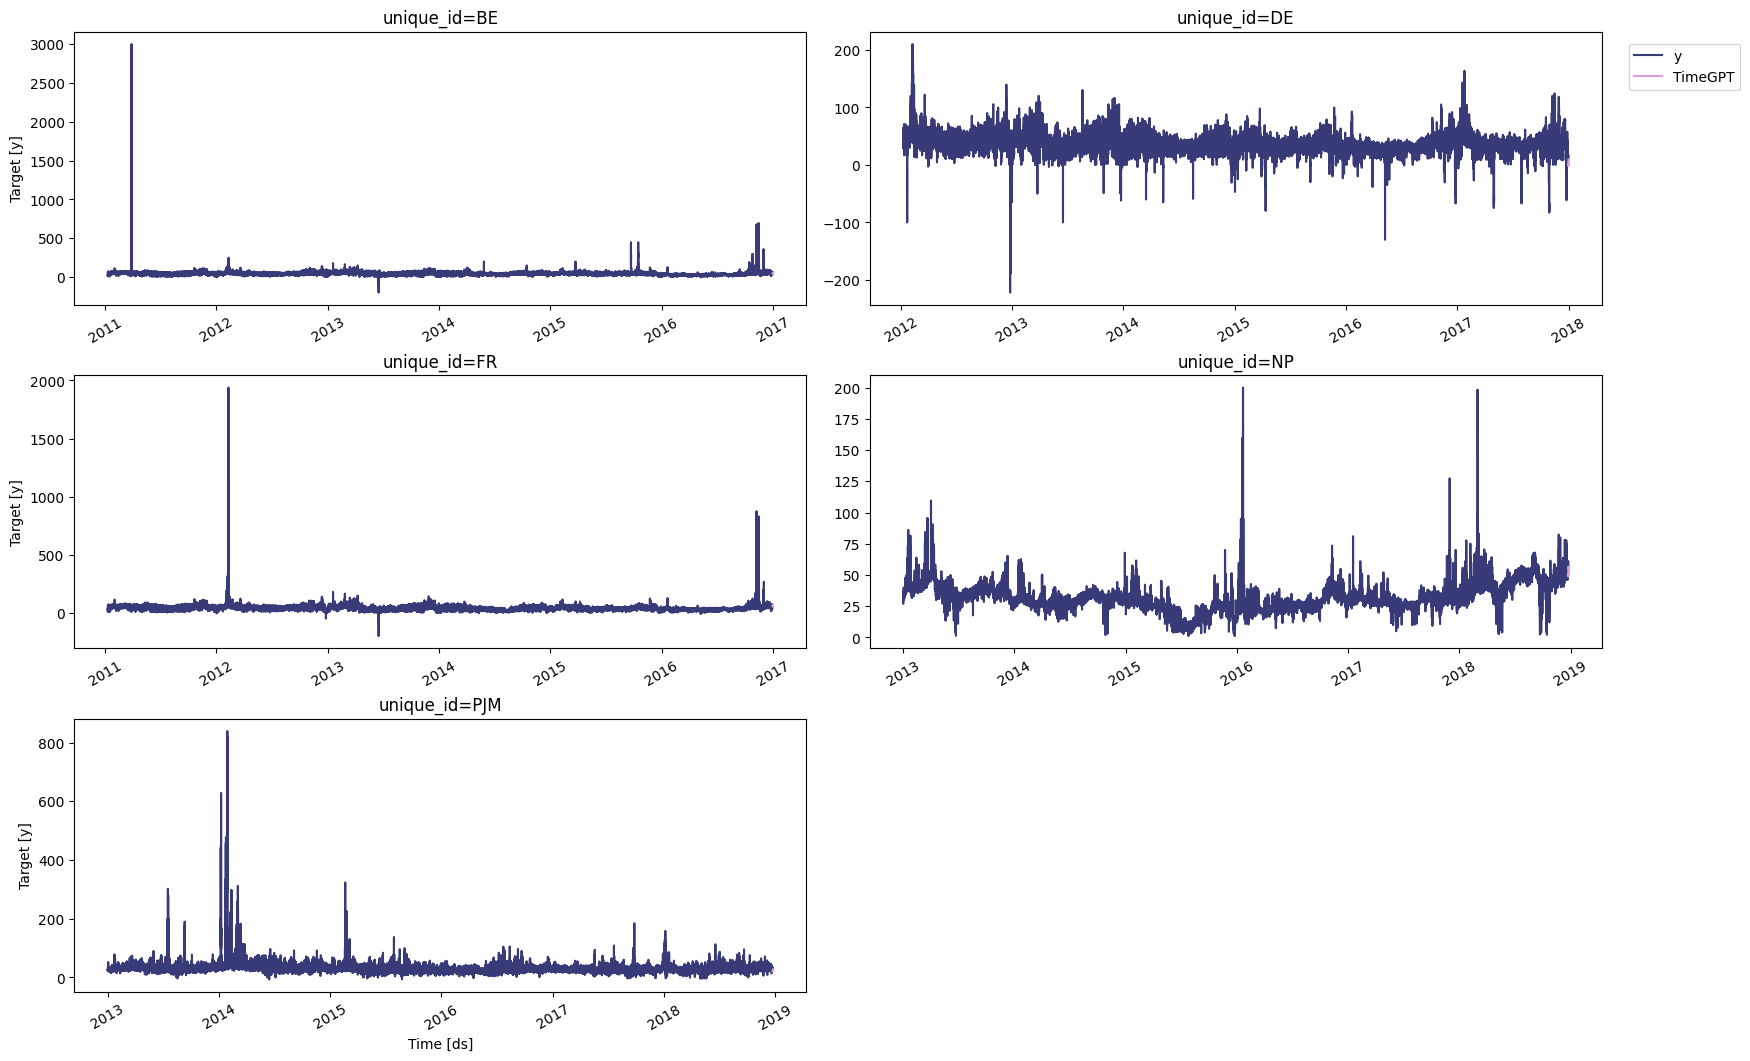

In [ ]:
nixtla_client.plot(
    df, timegpt_fcst_finetune_df,
    time_col='ds', target_col='y',
)

In [ ]:
train = df[:-24]
test = df[-24:]

In [ ]:
depths = [1, 2, 3, 4, 5]

test = test.copy()

for depth in depths:
    preds_df = nixtla_client.forecast(
        df=train,
        h=24,
        finetune_steps=5,
        finetune_depth=depth,
        time_col='ds',
        target_col='y'
    )

    # Get only the last 24 predictions
    preds = preds_df['TimeGPT'].values[-24:]  # Add this line to get last 24 values

    test.loc[:,f'TimeGPT_depth{depth}'] = preds

In [ ]:
test['unique_id'] = 0

evaluation = evaluate(test, metrics=[mae, mse], time_col="ds", target_col="y")
evaluation

,unique_id,metric,TimeGPT_depth1,TimeGPT_depth2,TimeGPT_depth3,TimeGPT_depth4,TimeGPT_depth5
0,0,mae,1.969959,1.901496,1.831438,1.742196,1.488164
1,0,mse,5.768481,5.485835,5.114053,4.589014,3.317864
